In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os
import sys

In [18]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [19]:
from scripts.load_data import load_data
news_path = '../Data/raw_analyst_ratings.csv'
stock_path = '../Data/AMZN_historical_data.csv'
aligned_data = load_data(news_path, stock_path)
# stock_data = stock_data.rename(columns={'Date': 'date'})

In [20]:
aligned_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,123.400497,124.400002,123.058502,123.919998,123.919998,53420000,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0


In [21]:
# from scripts.sentiment import get_sentiment, apply_sentiment_analysis
from scripts.analyze_sentiment import analyze_and_display_sentiment
analyze_and_display_sentiment(aligned_data, 'headline')
aligned_data.head()

                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,123.400497,124.400002,123.058502,123.919998,123.919998,53420000,0.0,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,122.750504,123.492500,121.506500,121.844002,121.844002,57342000,0.0,0.0,0.0


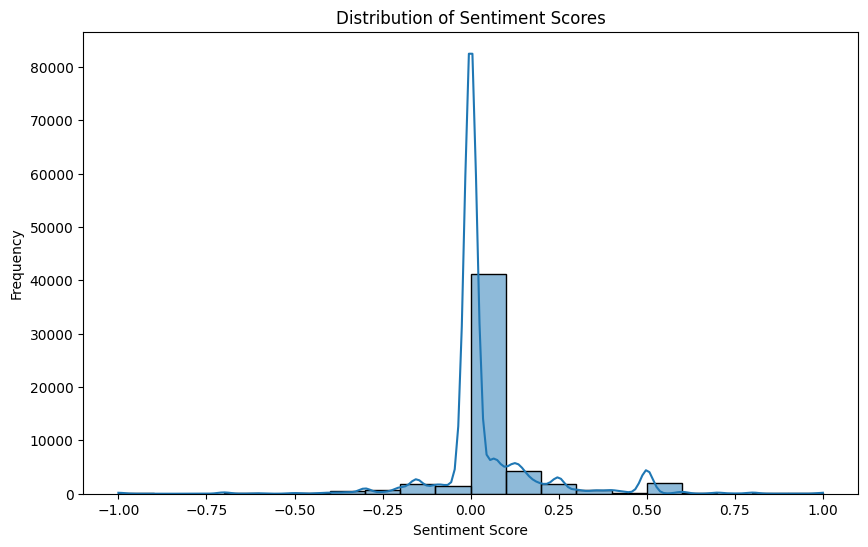

In [22]:
from scripts.plot_sentiment import plot_sentiment_distribution
plot_sentiment_distribution(aligned_data)

In [23]:
from scripts.calculate_daily_returns import calculate_daily_returns
calculate_daily_returns(aligned_data)
# Drop the first row with NaN values due to pct_change()
aligned_data = aligned_data.dropna()
print(aligned_data[['date', 'Close', 'daily_return']].head())


         date       Close  daily_return
1  2020-06-03  123.919998     -0.001853
2  2020-05-26  121.093002     -0.022813
3  2020-05-22  121.844002      0.006202
4  2020-05-22  121.844002      0.000000
5  2020-05-22  121.844002      0.000000


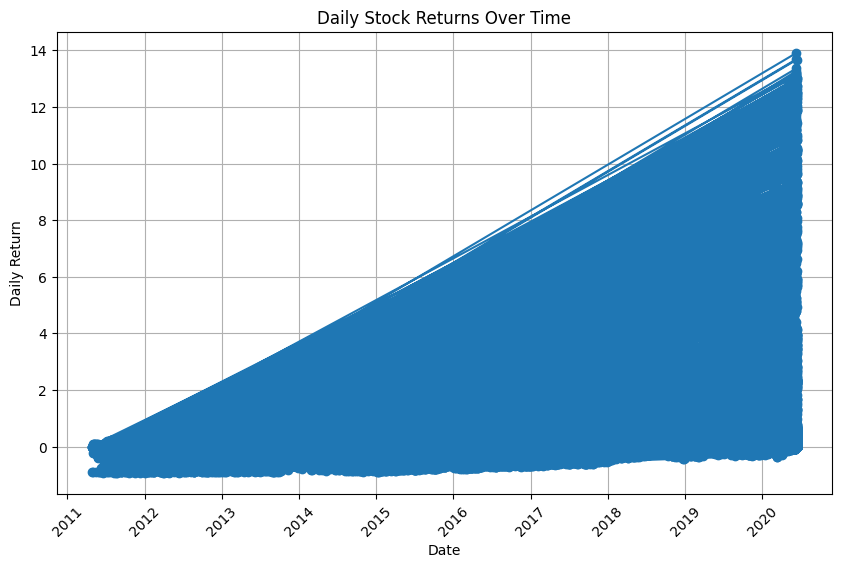

In [24]:
from scripts.plot_daily_returns_over_time import plot_daily_returns_over_time
plot_daily_returns_over_time(aligned_data)

In [25]:
from scripts.calculate_daily_sentiment_and_merge import calculate_daily_sentiment_and_merge
final_data = calculate_daily_sentiment_and_merge(aligned_data)
final_data.head()

,date,sentiment,daily_return
0,2011-04-28,0.045455,0.004325
1,2011-04-28,0.045455,-0.012804
2,2011-04-28,0.045455,-0.018763
3,2011-04-29,0.166667,-0.012855
4,2011-04-29,0.166667,-0.896206


In [26]:
correlation = final_data['sentiment'].corr(final_data['daily_return'])
print(f"Correlation between daily sentiment scores and stock returns: {correlation}")


Correlation between daily sentiment scores and stock returns: -0.014889871904685006


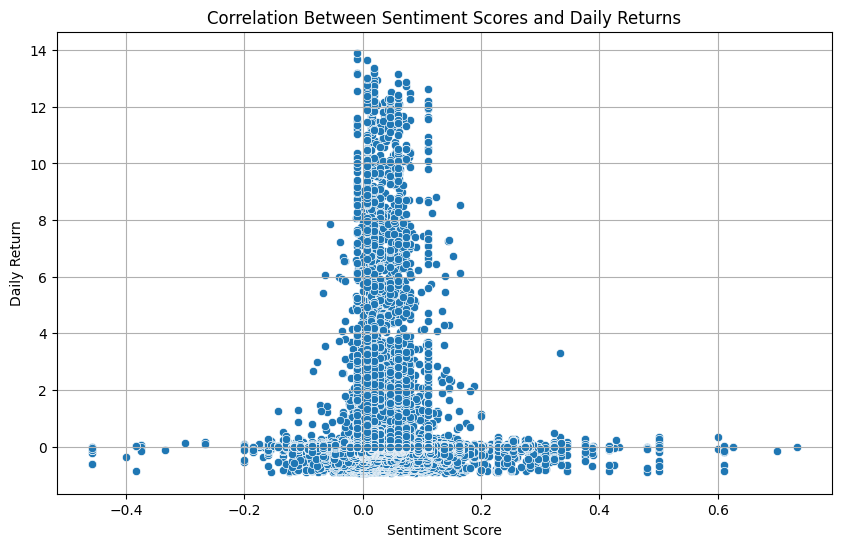

In [27]:
from scripts.plot_sentiment_vs_daily_return import plot_sentiment_vs_daily_return
plot_sentiment_vs_daily_return(final_data)

ADD VISUALIZATIONS

In [28]:
# Calculate rolling averages
window_size = 7  # Number of days for rolling average

final_data['rolling_sentiment'] = final_data['sentiment'].rolling(window=window_size).mean()
final_data['rolling_return'] = final_data['daily_return'].rolling(window=window_size).mean()


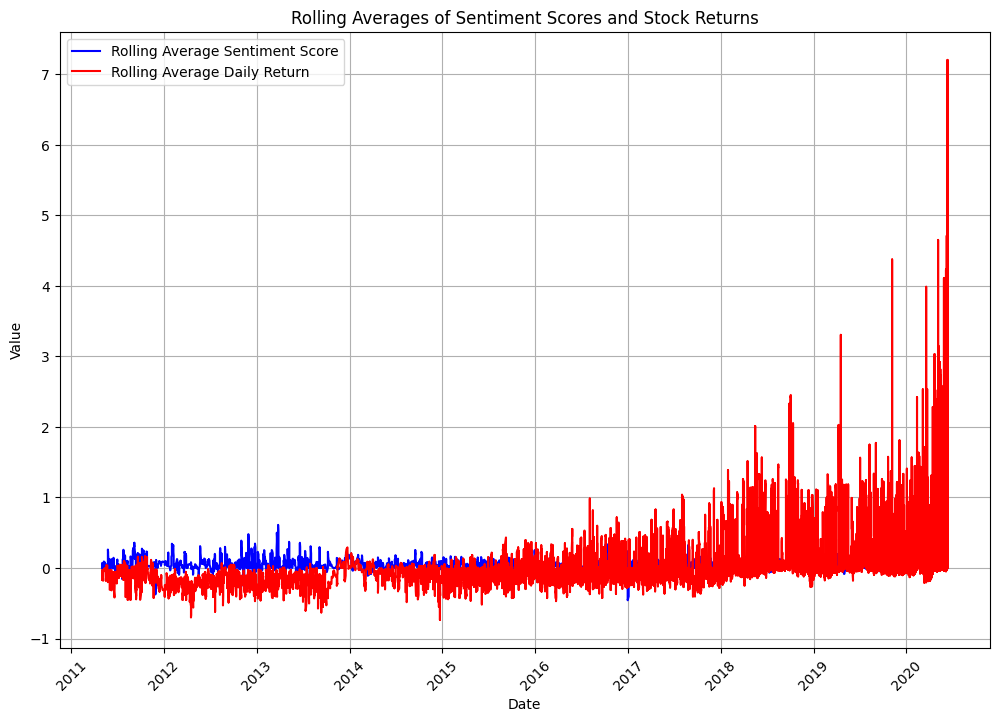

In [29]:
from scripts.plot_rolling_averages import plot_rolling_averages
plot_rolling_averages(final_data)

In [30]:
correlation_matrix = final_data[['sentiment', 'daily_return']].corr()

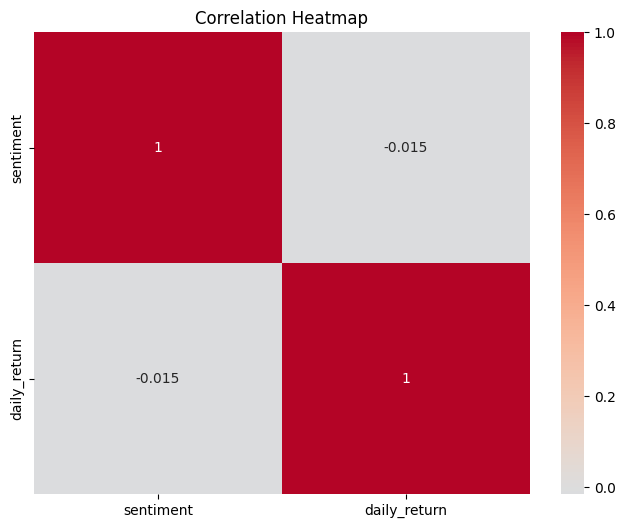

In [31]:
from scripts.plot_correlation_heatmap import plot_correlation_heatmap
plot_correlation_heatmap(correlation_matrix)